In [ ]:
import pandas as pd
import numpy as np

Na skupu bank.csv izvršiti sledece promene:

In [ ]:
#Učitati skup 24-bank.csv
data = pd.read_csv("/content/24-bank.csv")

In [ ]:
# Ispisati prvih 5 instanci
data.head()

,STAROST,POSAO,BRACNO_STANJE,OBRAZOVANJE,SREDNJE_GOD_STANJE_EUR,STAMBENI_KREDIT,LICNI_KREDIT,KONTAKT,DUZINA_RAZGOVORA_SEC,BROJ_RAZGOVORA,OROCENA_STEDNJA
0,30,nezaposlen,u_braku,osnevne,1787,ne,ne,mobilni,79,1,ne
1,33,usluge,u_braku,srednje,4789,da,da,mobilni,220,1,ne
2,35,rukovodstvo,samac,visoko,1350,da,ne,mobilni,185,1,ne
3,30,rukovodstvo,u_braku,visoko,1476,da,da,nepoznato,199,4,ne
4,59,manuelni_poslovi,u_braku,srednje,0,da,ne,nepoznato,226,1,ne


In [ ]:
data.shape

(4521, 11)

In [ ]:
data.describe()

,STAROST,SREDNJE_GOD_STANJE_EUR,DUZINA_RAZGOVORA_SEC,BROJ_RAZGOVORA
count,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630
std,10.576211,3009.638142,259.856633,3.109807
min,19.000000,-3313.000000,4.000000,1.000000
25%,33.000000,69.000000,104.000000,1.000000
50%,39.000000,444.000000,185.000000,2.000000
75%,49.000000,1480.000000,329.000000,3.000000
max,87.000000,71188.000000,3025.000000,50.000000


In [ ]:
# Eliminisati instance koje imaju negativnu vrednost u atributu srednje_god_stanje_eur.
data[data['SREDNJE_GOD_STANJE_EUR'] < 0] = np.nan
data = data.dropna()

In [ ]:
data.describe()

,STAROST,SREDNJE_GOD_STANJE_EUR,DUZINA_RAZGOVORA_SEC,BROJ_RAZGOVORA
count,4155.000000,4155.000000,4155.000000,4155.000000
mean,41.297232,1577.000963,263.861372,2.802888
std,10.694177,3090.416228,260.473877,3.114009
min,19.000000,0.000000,4.000000,1.000000
25%,33.000000,141.500000,104.000000,1.000000
50%,39.000000,542.000000,186.000000,2.000000
75%,49.000000,1637.000000,328.000000,3.000000
max,87.000000,71188.000000,3025.000000,50.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4155 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STAROST                 4155 non-null   float64
 1   POSAO                   4155 non-null   object 
 2   BRACNO_STANJE           4155 non-null   object 
 3   OBRAZOVANJE             4155 non-null   object 
 4   SREDNJE_GOD_STANJE_EUR  4155 non-null   float64
 5   STAMBENI_KREDIT         4155 non-null   object 
 6   LICNI_KREDIT            4155 non-null   object 
 7   KONTAKT                 4155 non-null   object 
 8   DUZINA_RAZGOVORA_SEC    4155 non-null   float64
 9   BROJ_RAZGOVORA          4155 non-null   float64
 10  OROCENA_STEDNJA         4155 non-null   object 
dtypes: float64(4), object(7)
memory usage: 389.5+ KB


In [ ]:
# Vrednosti atributa starost podeliti u 5 kategorija jednake širine. HINT: Koristiti pd.cut(....)

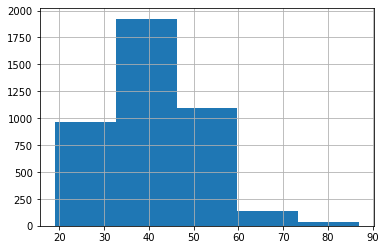

In [ ]:
data['STAROST'].hist(bins=5)
data['STAROST'] = pd.cut(data.STAROST, bins=5, labels=[1, 2, 3, 4, 5])

In [ ]:
# Promeniti kategorije atributa bracno_stanje u u_braku i nije_u_braku.
values = data['BRACNO_STANJE'].unique()
data.BRACNO_STANJE.replace(values[1:], 'nije_u_braku', inplace=True)
data.BRACNO_STANJE

0            u_braku
1            u_braku
2       nije_u_braku
3            u_braku
4            u_braku
            ...     
4514         u_braku
4515    nije_u_braku
4518         u_braku
4519         u_braku
4520    nije_u_braku
Name: BRACNO_STANJE, Length: 4155, dtype: object

In [ ]:
# Standardizovati numeričke atribute
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x = scaler.fit_transform(data[data.columns[data.dtypes == 'float64']])
x
# data.info()
# data[data.columns[data.dtypes == 'float64']]

array([[ 0.06795988, -0.70979717, -0.57903006],
       [ 1.03946698, -0.16841094, -0.57903006],
       [-0.07346204, -0.3027976 , -0.57903006],
       ...,
       [-0.41488109, -0.43334463,  2.63265051],
       [-0.14239309, -0.51781624,  0.38447411],
       [-0.14271671,  0.31154139, -0.25786201]])

In [ ]:
data.describe()